# Test9
 #### Pierre Ekelmans (translated by Antoni Bertolin to python)
General Introduction
This test is designed to achieve contrast invariant response in spatially structured networks with synaptic plasticity.
This is based on the results shown in the Bernaez-Timon et al., manuscript (in preparation)
The features tested are : Distance Connectivity, SpatialGaussianStimulus, PowerLawSynapse and Heatmap recording.
Warning: The simulations can take hours to run.
This Live Script runs with Matlab
Figures

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def space_balanced(J, Sstim, SconE, pexE, fracE, mu, k):
    Xlim = 4 * np.sqrt(Sstim ** 2 - SconE ** 2)
    #X = np.arange(-1, 1, 0.02) * Xlim #redundant?
    X = np.linspace(-Xlim, Xlim, int(1e4 + 1))
    X=np.array(X)
    J = np.abs(J)
    b = (J[1] - J[3]) / (J[0] * J[3] - J[1] * J[2])
    c = (J[0] - J[2]) / (J[0] * J[3] - J[1] * J[2])
    nu = (mu * b * Sstim / (pexE * fracE * np.sqrt(Sstim ** 2 - SconE ** 2))) * np.exp(-X ** 2 /((k+1)*( 2 * Sstim ** 2 - 2 * SconE ** 2)))
    nu = nu ** (1 / (1 + k))
    #print(nu)
    SconI = SconE
    pexI = pexE
    nu_I = (mu * c * Sstim / (pexI * (1 - fracE) * np.sqrt(Sstim ** 2 - SconI ** 2))) * np.exp(-X ** 2 / (2 * Sstim ** 2 - 2 * SconI ** 2))
    #print(nu_I)
    #print (np.max(nu, X, nu_I))
    return nu, X, nu_I


In [3]:
# Import Data
base_path = os.getcwd()
project_name1 = 'Test9A';#For the simulation at high input level. project_name is an identifier of the folder(s) containing the simulation data. The date suffix does not need to be included
project_name2 = 'Test9B';#For the simulation at low input level. Idem
# Import data Simulation1
folder_list1 = [f for f in os.listdir(base_path) if f.startswith(project_name1)]
folder_list2 = [f for f in os.listdir(base_path) if f.startswith(project_name2)]
index = -1 #Here you can select among latest simulations
folder_name1 = sorted(folder_list1)[index]
folder_name2 = sorted(folder_list2)[index]

# Import data from first project
filenametemp = [f for f in os.listdir(folder_name1) if f.endswith('_HeatmapRate_Pop0.dat')]
filename = os.path.join(base_path,os.path.join(folder_name1,filenametemp[0]))
with open(filename, 'r') as file:
    df = pd.read_csv(filename, sep='\t', header=0, skiprows=10, comment="#")
Test9A = df.iloc[:, :-1]

# Import data from second project
filenametemp = [f for f in os.listdir(folder_name2) if f.endswith('_HeatmapRate_Pop0.dat')]
filename = os.path.join(base_path,os.path.join(folder_name2,filenametemp[0]))
with open(filename, 'r') as file:
    df = pd.read_csv(filename, sep='\t', header=0, skiprows=10, comment="#")
Test9B = df.iloc[:, :-1]
print(folder_name1)
print(folder_name2)

Test9A_2023_07_11_10-14-00
Test9B_2023_07_11_10-26-34


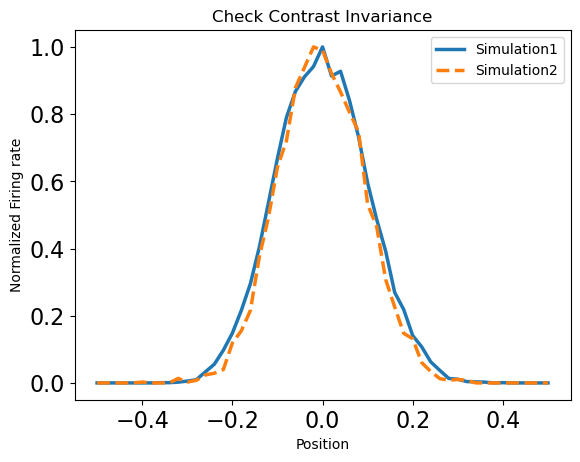

In [4]:
#Analysis

# Create figure and axes
fig, ax = plt.subplots()

# Plot normalized data from Test9A and Test9B
ax.plot(np.linspace(-0.5, 0.5, 51), Test9A.iloc[-1, 1:] / np.max(Test9A.iloc[-1, 1:]), linewidth=2.5)
ax.plot(np.linspace(-0.5, 0.5, 51), Test9B.iloc[-1, 1:] / np.max(Test9B.iloc[-1, 1:]), linestyle='--', linewidth=2.5)

# Set figure title and legend
ax.set_title('Check Contrast Invariance')
ax.legend(['Simulation1', 'Simulation2'])

# Set x- and y-axis labels
ax.set_xlabel('Position')
ax.set_ylabel('Normalized Firing rate')

# Set font size
ax.tick_params(axis='both', which='major', labelsize=16)

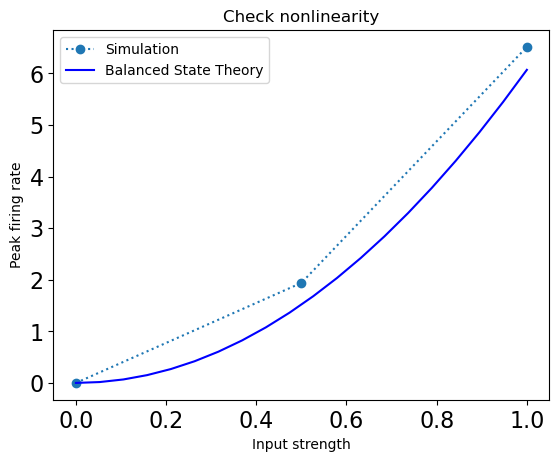

In [5]:
# Set up the figure and axes
fig, ax = plt.subplots()

# Plot the first line using the plot function
ax.plot([0, 0.5, 1], [0, max(Test9B.iloc[-1, 1:]), max(Test9A.iloc[-1, 1:])], 'o:')

# Calculate the peak firing rates for a range of input strengths using a for loop
I = np.linspace(0, 1, 20)
nu_BS = np.zeros(len(I))
nu_B = np.zeros(len(I))
nu_BS=nu_BS.tolist()
nu_B=nu_B.tolist()
for i in range(len(I)):
    nu_BS[i] = np.max(space_balanced([2, -10, 5, -12], 0.16, 0.1, 0.05, 0.8, I[i], -0.5))
    nu_B[i] = np.max(space_balanced([2, -10, 5, -12], 0.16, 0.1, 0.05, 0.8, I[i], -0.5)[0])

# Plot the second line using the plot function
ax.plot(I, nu_B, 'b')

# Add a legend, x-axis label, y-axis label, and title to the figure
ax.legend(['Simulation', 'Balanced State Theory'])
ax.set_xlabel('Input strength')
ax.set_ylabel('Peak firing rate')
ax.set_title('Check nonlinearity')

# Adjust the axis limits and font size
ax.axis('tight')
ax.tick_params(labelsize=16)